okay so we want a  deta  chain that doesa few things


it  should represent a  target que to a Hud or an automated targetter

we should be able to

add a target

remove a target

set a targets priorities

read in target attributes from long term storage (csv)

order targets by priority

only datachains



so basically we want this at the end

 now target added
 
  search database for target attributes
  
   save attributes
   
   use attributes to Rock paper  scissors
  
   return list of effective weapons sorted by priority of usage that causes effective  destruction or manipulation of target

okay so first steps  build datachain  then come back

In [1]:
class link:
    def __init__(self, data):
        self.data = data
        self.nextlink = None

        
class chain:
    def __init__(self):
        self.firstlink = self.endlink = None
        self.chainlength = 0
        
    def add_link(self, data):
        newlink = link(data)
        self.chainlength += 1
        if self.firstlink == None:
            self.firstlink = self.endlink = newlink
        else:
            self.endlink.nextlink = newlink
            self.endlink = newlink
    
    def printdata(self):
        currentlink = self.firstlink
        print("[", end="")
        for i in range(self.chainlength-1):
            print(currentlink.data, end=", ")
            currentlink = currentlink.nextlink
        print(self.endlink.data, end="]\n")

In [2]:
newchain = chain()
for i in range(1,10):
    newchain.add_link(i)

newchain.printdata()

[1, 2, 3, 4, 5, 6, 7, 8, 9]


okay so let's proposea hypothetical   situation


well call  them  titanfall pilot bots

enemies are other pilots we will constrain to just this for example  simplicity


okay so or  target tracker has to now do two things

scan  horizon and surroundings for other pilots

if our  scanner (robo pilot vision system) finds another pilot it must  become aware of this

 and also identify the  enemy pilots loadout  strengths and weaknesses  right
 
  okay so now our vision system is requesting our target datastructure to do two things 
  
 hey store a target and pull up known abilities and weaknesses of target
 
 
 okay
 
 actually lets broaden it but limit it to this specific instance below that requires decisive decision making that is time based and knowledge based about the environment
 
 
 
 
 
 <hr>
 
 our robo pilot is running forward and sees the reactor about to be destroyed by a group of 3 pilots, 2 titans, 20 grunts in 3 clusters, 2 cloak drones covering 2 pilots's position in quick as possible time
 
 we will describe the orchestration and paticularity of hypothetical weapons involved as we go
 
 so what do we want our robo pilot do to after becoming aware of this in its senses?
 
 start a decicive action todo list
 
 we know that priority is save the reactor
 
 we know that based off of our target awareness and perception each titan has two cannons that will reduce the reactors health by 20 points every 10 seconds and in 50 seconds under just one of their fire the reactor will die
 
 we  know  that the enemy pilots will attack titan enemies faster than the grunts 
 
 we know  that the grunts attack  the ractor the least but under an uncontrolled state they can cause slow decay to the reactor that will lead to  death
 
 under the 3 pilots own effectence they can kill the reactor in around 4 minutes
 
 they are mostly swarm flies to keep interference from happening to the main guns which are the titans
 
 right so the reactor is about to die how do we make that todo list
 
 
 well lets make an artificially intellligent system that requires no parralelism to living conciousness in the form of a bubbling todolist
 
 
 lets before we do that continue to elaborate on this hypothetical
 
 we are back to our robo pilot running towards the offense that is progressing towards  the reactor to kill it 
 
 okay so we know that priority wise what has to happen firrst ot save the reactor
 
 the titans need to be destroyed
 
 we cannot do that until the three pilots that protect their back  are destroyed
 
 wecannot  destroy all three pilots until awareness is at maximum and it is currently not because the cloak drones are masking two of the enemy pilots
 
 okay so what do we know
 
 we know that the reactor will die if we do not disable the titans
 
 we know that attempts to disable the enemy titans will most  likely fail fail if we do not first stop the enemy pilots
 
 we know that we have a better chance of stopping the enemy pilots if we decloak the two masked pilots
 
 weknow  that in a speed bump state the grunts can both kill the robo pilot and the reactor
 
 weknow
 
 
 kill the two cloak  drones
 
 kill the three pilots
 
 kill the two titans
 
 kill the grunts
 
 right?? wejust made decisive  action over saving the reactor by analyzing the in the time moment playing field and the abilities and their dependance and independance of eachother
 
 
 we did  not use machine learning
 
 
 we  used quantification of time based effectance
 
 right
 
 so lets build an approach that resembles decisive  action of this nature by just using time based  effectance and quantification of it 
 
 
 that will be 
 
 
 a datachain that stores targets
 
 a datachain that loads  attributes of targets
 
 a  datachain that takes and sets priorities  of damage  on reactor
 
 a datachain that takes and sets priorites of damage  on the robo pilot
 
 a datachain that upon in the moment full awareness can sort itself and provide the todolist that saves the reactor
 
 
 
 okay for sake of the problem at hand we willswitch away from  custom  class based datachains and use the built  in lists that are datachains in python for readability simplicity
 
 it willmake the processmore understandable

In [3]:
newchain = chain()
for i in range(1,10):
    newchain.add_link(i)

newchain.printdata()

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
newchain = [i for i in range(1, 10)]
newchain

[1, 2, 3, 4, 5, 6, 7, 8, 9]

right

In [5]:
target_list = []

# we add the targets in the order that we see them
target_list.append(['EnemyTitan1'])
target_list.append(['gruntCluster1'])
target_list.append(['cloakedPilot1'])
target_list.append(['EnemyTitan2'])
target_list.append(['gruntCluster2'])
# they running together
target_list.append(['cloakedPilot2, Pilot3 (running together)'])
target_list.append(['gruntCluster3'])

In [6]:
# this is the  format  of our targetlists
#[Target, xyz-coord, predicted_path_line, attributes...]

# so lets  take a look at all of our targets and count them
num_titans = 0
num_pilots = 0
num_cloakdrones = 0
num_grunts = 0

# print out the target lists
print("Current Target List:")
for target in target_list:
    if "Titan" in target[0]:
        num_titans += 1
    if "cloak" in target[0]:
        num_cloakdrones  +=  1
    if "grunt" in target[0]:
        num_grunts += 1
    if "Pilot" in target[0] and target[0].count(',') == 0:
        num_pilots += 1
    # maybe dual pilot movement easier to kill right
    if "Pilot" in target[0] and "," in target[0]:
        numDancers = target[0].count(',')+1
        num_pilots +=  numDancers

    print(target[0])
# print out current observations
print("---------------------------")
print(f"Number titans: {num_titans}")
print(f"Number pilots: {num_pilots}")
print(f"Number grunt clusters: {num_grunts}")
print(f"Number cloak drones: {num_cloakdrones}")

Current Target List:
EnemyTitan1
gruntCluster1
cloakedPilot1
EnemyTitan2
gruntCluster2
cloakedPilot2, Pilot3 (running together)
gruntCluster3
---------------------------
Number titans: 2
Number pilots: 3
Number grunt clusters: 3
Number cloak drones: 2


okay so at this point we should check if we have any knowledge of the classified identified and reported targets

this is stored in our target_knowledge database

the format is 

[reactor health taken per second, most effective weapon to stop them, speed (relative]

so lets update our target list with that data

our target list is a list of  lists

at each point in our target list we have a list

on that list our first item represents what the target is   
the next item is the xyz coordinate  
the next n items are target attributes that follow our database format

okay lets set random poisitions since this isnt a physical location example just a flow of logic example

we will just set None values for the xyz position

lets do that now

In [7]:
# update targets positions

for target in target_list:
    xyz = None
    target.append(xyz)

In [8]:
for target in target_list:
    print(f"{target[0]} at position: {target[1]}")

EnemyTitan1 at position: None
gruntCluster1 at position: None
cloakedPilot1 at position: None
EnemyTitan2 at position: None
gruntCluster2 at position: None
cloakedPilot2, Pilot3 (running together) at position: None
gruntCluster3 at position: None


before orchestrating a sorting method to perform these actions for us lets first go through it and do it manually to see whats going on

before we take  out any target we must know what each target can do to the reactor and our robo pilot

In [9]:
# update target knowledge
titanknowledge = open('target_knowledge/Titan.csv')
titan = []
for line in titanknowledge:
    for item in line.split(','):
        titan.append(item)

gruntclusterknowledge  =  open('target_knowledge/GruntCluster.csv')
grunt = []
for line in gruntclusterknowledge:
    for item in line.split(','):
        grunt.append(item)

cloakdroneknowledge = open('target_knowledge/CloakDrone.csv')
cloakdrone = []
for line in cloakdroneknowledge:
    for item in line.split(','):
        cloakdrone.append(item)

pilotknowledge = open('target_knowledge/Pilots.csv')
pilot = []
for line in  pilotknowledge:
    for item in line.split(','):
        pilot.append(item)

        
for target in target_list:
    if "Titan" in target[0]:
        targetattributes = titan
    if "grunt" in target[0]:
        targetattributes = grunt
    if "Pilot" in target[0] and target[0].count(',') == 0:
        targetattributes = pilot
    if "Pilot" in target[0] and "," in target[0]:
        print(target[0])
        numDancers = target[0].count(",") + 1
        targetattributes = pilot
        targetattributes[0] = float(targetattributes[0])*2
    if "cloak" in target[0]:
        targetattributes.append(cloakdrone)
    target.append(targetattributes)

cloakedPilot2, Pilot3 (running together)


In [10]:
for target in target_list:
    print(f"{target[0]} at position {target[1]}, damage: {target[2][0]} per sec")

EnemyTitan1 at position None, damage: 2 per sec
gruntCluster1 at position None, damage: 0.0008 per sec
cloakedPilot1 at position None, damage: 0.82 per sec
EnemyTitan2 at position None, damage: 2 per sec
gruntCluster2 at position None, damage: 0.0008 per sec
cloakedPilot2, Pilot3 (running together) at position None, damage: 0.82 per sec
gruntCluster3 at position None, damage: 0.0008 per sec


okay lets actually give our targets some updated example coordinates so we can draw our reactor and the enemies from a top down view point

In [11]:
target_list

[['EnemyTitan1', None, ['2', ' titan_gun', ' 30']],
 ['gruntCluster1', None, ['0.0008', ' mele', ' 10']],
 ['cloakedPilot1',
  None,
  [0.82, ' star', ' 70', ['0', ' gun', ' 110'], ['0', ' gun', ' 110']]],
 ['EnemyTitan2', None, ['2', ' titan_gun', ' 30']],
 ['gruntCluster2', None, ['0.0008', ' mele', ' 10']],
 ['cloakedPilot2, Pilot3 (running together)',
  None,
  [0.82, ' star', ' 70', ['0', ' gun', ' 110'], ['0', ' gun', ' 110']]],
 ['gruntCluster3', None, ['0.0008', ' mele', ' 10']]]

In [12]:
# set reactors position birds eye view
reactor_position = [10, 10]
reactor_health = 100
# set robo pilot position
robo_pilot_position = [8, 4]

# set titan 1 position
target_list[0][1] = [2, 3]
# set titan 2 position
target_list[3][1] = [3, 5]
titan_positions = [target_list[0][1], target_list[3][1]]
# set grunt clusters positions
target_list[1][1] = [1, 5]
target_list[4][1] = [1, 2]
target_list[6][1] = [3, 9]
grunt_positions = [target_list[1][1], target_list[4][1], target_list[6][1]]
# set enemy pilot positions
target_list[2][1] = [5, 12]
target_list[5][1] = [[9,9],[8,8]]
pilot_positions = [target_list[2][1], target_list[5][1]]

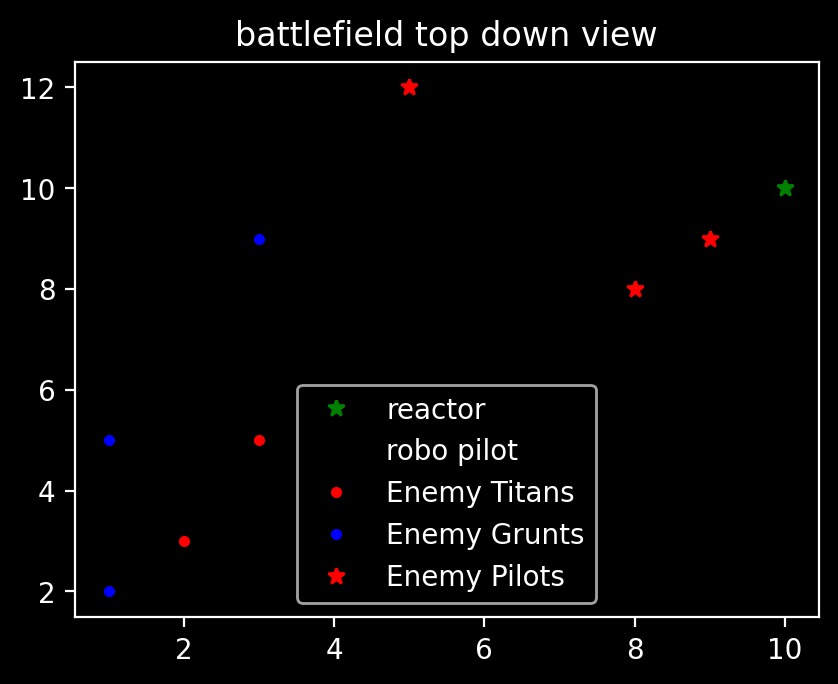

In [13]:
import matplotlib.pyplot as plt
plt.title('battlefield top down view')
plt.plot(reactor_position[0], reactor_position[1], 'g*', label=f"reactor")
plt.plot(robo_pilot_position[0], robo_pilot_position[1], 'k*', label="robo pilot")
titan_x = []
titan_y = []
for position in titan_positions:
    titan_x.append(position[0])
    titan_y.append(position[1])
plt.plot(titan_x, titan_y, 'r.', label="Enemy Titans")
grunt_x = []
grunt_y = []
for position in grunt_positions:
    grunt_x.append(position[0])
    grunt_y.append(position[1])
plt.plot(grunt_x, grunt_y, 'b.', label = "Enemy Grunts")
pilot_x = []
pilot_y = []
for position in pilot_positions:
    if type(position[0]) == int:
        pilot_x.append(position[0])
        pilot_y.append(position[1])
    else:
        for pos in position:
            pilot_x.append(pos[0])
            pilot_y.append(pos[1])
plt.plot(pilot_x, pilot_y, 'r*', label="Enemy Pilots")
plt.legend()
plt.show()

In [14]:
target_list

[['EnemyTitan1', [2, 3], ['2', ' titan_gun', ' 30']],
 ['gruntCluster1', [1, 5], ['0.0008', ' mele', ' 10']],
 ['cloakedPilot1',
  [5, 12],
  [0.82, ' star', ' 70', ['0', ' gun', ' 110'], ['0', ' gun', ' 110']]],
 ['EnemyTitan2', [3, 5], ['2', ' titan_gun', ' 30']],
 ['gruntCluster2', [1, 2], ['0.0008', ' mele', ' 10']],
 ['cloakedPilot2, Pilot3 (running together)',
  [[9, 9], [8, 8]],
  [0.82, ' star', ' 70', ['0', ' gun', ' 110'], ['0', ' gun', ' 110']]],
 ['gruntCluster3', [3, 9], ['0.0008', ' mele', ' 10']]]

okay lets take some more notes

so what should we do with this hypothetical birds eye view

well for simplicity lets assume our robo pilot is rightfully equiped to take down all enemies but there is a time constraint


we should create a program that every second it decremints the reactor by the remaining opposing forces

we need to give our pilot a relative speed in the xy plane

our pilot will need to navigate to and remove each enemy

we shouold at the end have a program that under no robo pilot effeectance kills the reactor in x amount of time

we should also have priorities set right and logic to sort the list resulting in a robo pilot path

that path will be:

go to the three pilots

remove them

go to the titans remove them

go to the grunts

remove them

save the reactor right

so that will look like this

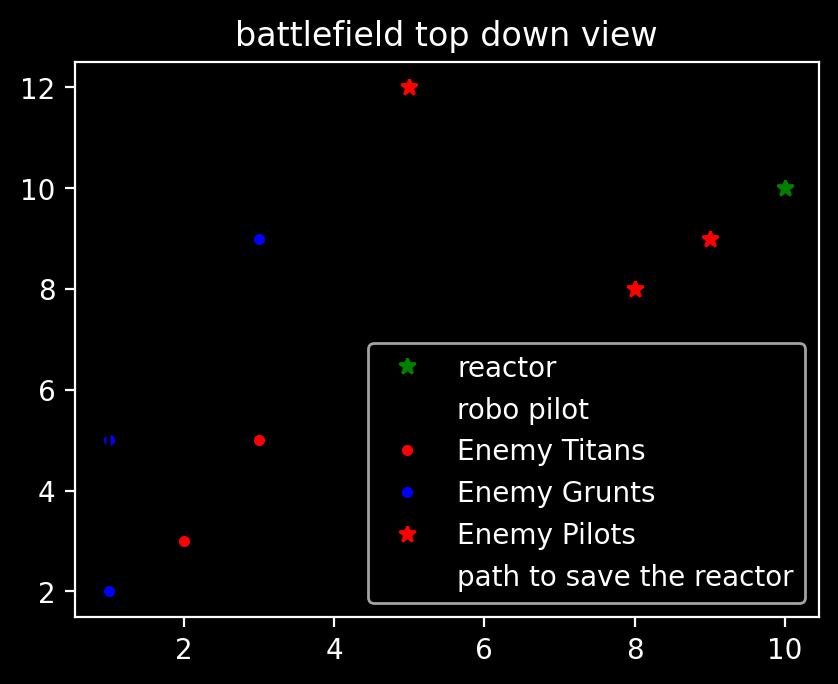

In [15]:
import matplotlib.pyplot as plt
plt.title('battlefield top down view')
plt.plot(reactor_position[0], reactor_position[1], 'g*', label=f"reactor")
plt.plot(robo_pilot_position[0], robo_pilot_position[1], 'k*', label="robo pilot")
titan_x = []
titan_y = []
for position in titan_positions:
    titan_x.append(position[0])
    titan_y.append(position[1])
plt.plot(titan_x, titan_y, 'r.', label="Enemy Titans")
grunt_x = []
grunt_y = []
for position in grunt_positions:
    grunt_x.append(position[0])
    grunt_y.append(position[1])
plt.plot(grunt_x, grunt_y, 'b.', label = "Enemy Grunts")
pilot_x = []
pilot_y = []
for position in pilot_positions:
    if type(position[0]) == int:
        pilot_x.append(position[0])
        pilot_y.append(position[1])
    else:
        for pos in position:
            pilot_x.append(pos[0])
            pilot_y.append(pos[1])
plt.plot(pilot_x, pilot_y, 'r*', label="Enemy Pilots")

robo_pathx = []
robo_pathy = []
robo_pathx.append(robo_pilot_position[0])
robo_pathy.append(robo_pilot_position[1])
robo_pathx.append(7)
robo_pathy.append(9)
robo_pathx.append(6)
robo_pathy.append(11)
robo_pathx.append(2)
robo_pathy.append(4)
for path in grunt_positions:
    robo_pathx.append(path[0])
    robo_pathy.append(path[1]+1)
plt.plot(robo_pathx, robo_pathy, 'k', label="path to save the reactor")
plt.legend()
plt.show()

okay so we need to add some not to scale movement over pissibly like 50 frames right

also the single pilots detriment points to reactor health per is wrong

also you dont add a predicted path list

lets say all targets predicted path is just a straight line

over no robo pilot effectsnce the reactor should die in frames

wr can add more complex paths and onstacles later 

titanfall game of life reactor robo pilot simulator


okay also just in case it ever helps

naming your relative associations your lists can be a nice thing 

like this for example

In [16]:
target_list

[['EnemyTitan1', [2, 3], ['2', ' titan_gun', ' 30']],
 ['gruntCluster1', [1, 5], ['0.0008', ' mele', ' 10']],
 ['cloakedPilot1',
  [5, 12],
  [0.82, ' star', ' 70', ['0', ' gun', ' 110'], ['0', ' gun', ' 110']]],
 ['EnemyTitan2', [3, 5], ['2', ' titan_gun', ' 30']],
 ['gruntCluster2', [1, 2], ['0.0008', ' mele', ' 10']],
 ['cloakedPilot2, Pilot3 (running together)',
  [[9, 9], [8, 8]],
  [0.82, ' star', ' 70', ['0', ' gun', ' 110'], ['0', ' gun', ' 110']]],
 ['gruntCluster3', [3, 9], ['0.0008', ' mele', ' 10']]]

In [17]:
targetNameIndex = 0

In [20]:
i = 0
for target in target_list:
    i += 1
    print(f"Target #{i}: {target[targetNameIndex]}")

Target #1: EnemyTitan1
Target #2: gruntCluster1
Target #3: cloakedPilot1
Target #4: EnemyTitan2
Target #5: gruntCluster2
Target #6: cloakedPilot2, Pilot3 (running together)
Target #7: gruntCluster3
